In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

In [2]:
dados = pd.read_csv('Dados/insurance.csv')
dados_treino = pd.read_csv('Dados/insurance_treino_20.csv')
dados_teste = pd.read_csv('Dados/insurance_teste_80.csv')

In [3]:
print(type(dados))
print(type(dados_treino))
print(type(dados_teste))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [4]:
print(dados)
print(dados_treino)
print(dados_teste)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
     age     sex     bmi  children smoker     region      charges
0     19  female  27.900         0    yes  southwest  16884.92400
1     18    male  33.770         1     

In [5]:
#renomeação das variáveis
dados = dados.rename(columns={'age': 'idade', 'sex': 'sexo', 'bmi': 'imc', 'children': 'dependentes', 'smoker': 'fumante', 'region': 'regiao', 'charges': 'custo'})
dados_treino = dados_treino.rename(columns={'age': 'idade', 'sex': 'sexo', 'bmi': 'imc', 'children': 'dependentes', 'smoker': 'fumante', 'region': 'regiao', 'charges': 'custo'})
dados_teste = dados_teste.rename(columns={'age': 'idade', 'sex': 'sexo', 'bmi': 'imc', 'children': 'dependentes', 'smoker': 'fumante', 'region': 'regiao', 'charges': 'custo'})

In [6]:
print(dados)
print(dados_treino)
print(dados_teste)

      idade    sexo     imc  dependentes fumante     regiao        custo
0        19  female  27.900            0     yes  southwest  16884.92400
1        18    male  33.770            1      no  southeast   1725.55230
2        28    male  33.000            3      no  southeast   4449.46200
3        33    male  22.705            0      no  northwest  21984.47061
4        32    male  28.880            0      no  northwest   3866.85520
...     ...     ...     ...          ...     ...        ...          ...
1333     50    male  30.970            3      no  northwest  10600.54830
1334     18  female  31.920            0      no  northeast   2205.98080
1335     18  female  36.850            0      no  southeast   1629.83350
1336     21  female  25.800            0      no  southwest   2007.94500
1337     61  female  29.070            0     yes  northwest  29141.36030

[1338 rows x 7 columns]
     idade    sexo     imc  dependentes fumante     regiao        custo
0       19  female  27.900 

In [7]:
#conversão do tipo das variáveis string em inteiros
dados['sexo']    = pd.to_numeric(dados['sexo'].map({'female': '1', 'male': '0'})).astype(int)
dados['fumante'] = pd.to_numeric(dados['fumante'].map({'yes': '1', 'no'  : '0'})).astype(int)
dados_treino['sexo']    = pd.to_numeric(dados_treino['sexo'].map({'female': '1', 'male': '0'})).astype(int)
dados_treino['fumante'] = pd.to_numeric(dados_treino['fumante'].map({'yes': '1', 'no'  : '0'})).astype(int)
dados_teste['sexo']     = pd.to_numeric(dados_teste['sexo'].map({'female': '1', 'male': '0'})).astype(int)
dados_teste['fumante']  = pd.to_numeric(dados_teste['fumante'].map({'yes': '1', 'no'  : '0'})).astype(int)

In [8]:
print(dados.info())
print(dados_treino.info())
print(dados_teste.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idade        1338 non-null   int64  
 1   sexo         1338 non-null   int32  
 2   imc          1338 non-null   float64
 3   dependentes  1338 non-null   int64  
 4   fumante      1338 non-null   int32  
 5   regiao       1338 non-null   object 
 6   custo        1338 non-null   float64
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 62.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idade        268 non-null    int64  
 1   sexo         268 non-null    int32  
 2   imc          268 non-null    float64
 3   dependentes  268 non-null    int64  
 4   fumante      268 non-null    int32  
 5   regiao       268 non-null    object

In [9]:
dados = dados.drop(columns=['regiao'])
dados_treino = dados_treino.drop(columns=['regiao'])
dados_teste = dados_teste.drop(columns=['regiao'])

In [10]:
print(dados.info())
print(dados_treino.info())
print(dados_teste.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idade        1338 non-null   int64  
 1   sexo         1338 non-null   int32  
 2   imc          1338 non-null   float64
 3   dependentes  1338 non-null   int64  
 4   fumante      1338 non-null   int32  
 5   custo        1338 non-null   float64
dtypes: float64(2), int32(2), int64(2)
memory usage: 52.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idade        268 non-null    int64  
 1   sexo         268 non-null    int32  
 2   imc          268 non-null    float64
 3   dependentes  268 non-null    int64  
 4   fumante      268 non-null    int32  
 5   custo        268 non-null    float64
dtypes: float64(2), int32(2), int64(2)
memory usage:

In [11]:
print(dados.describe())
print(dados_treino.describe())
print(dados_teste.describe())

             idade         sexo          imc  dependentes      fumante  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.494768    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     0.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

              custo  
count   1338.000000  
mean   13270.422265  
std    12110.011237  
min     1121.873900  
25%     4740.287150  
50%     9382.033000  
75%    16639.912515  
max    63770.428010  
            idade        sexo         imc  dependentes     fumante  \
count  268.000000  268.000000  268.000000   268.000000  268.00000

In [12]:
print(dados.describe().T)
print(dados_treino.describe().T)
print(dados_teste.describe().T)

              count          mean           std        min         25%  \
idade        1338.0     39.207025     14.049960    18.0000    27.00000   
sexo         1338.0      0.494768      0.500160     0.0000     0.00000   
imc          1338.0     30.663397      6.098187    15.9600    26.29625   
dependentes  1338.0      1.094918      1.205493     0.0000     0.00000   
fumante      1338.0      0.204783      0.403694     0.0000     0.00000   
custo        1338.0  13270.422265  12110.011237  1121.8739  4740.28715   

                  50%           75%          max  
idade          39.000     51.000000     64.00000  
sexo            0.000      1.000000      1.00000  
imc            30.400     34.693750     53.13000  
dependentes     1.000      2.000000      5.00000  
fumante         0.000      0.000000      1.00000  
custo        9382.033  16639.912515  63770.42801  
             count          mean           std        min          25%  \
idade        268.0     39.044776     14.453006    

In [13]:
dados_correlacao = pd.DataFrame(dados, columns=['idade', 'sexo', 'imc','dependentes', 'fumante', 'custo'])
dados_correlacao = dados_correlacao.corr()
dados_treino_correlacao = pd.DataFrame(dados_treino, columns=['idade', 'sexo', 'imc','dependentes', 'fumante', 'custo'])
dados_treino_correlacao = dados_treino_correlacao.corr()
dados_teste_correlacao = pd.DataFrame(dados_teste, columns=['idade', 'sexo', 'imc','dependentes', 'fumante', 'custo'])
dados_teste_correlacao = dados_teste_correlacao.corr()

In [14]:
print(dados_correlacao)
print(dados_treino_correlacao)
print(dados_teste_correlacao)

                idade      sexo       imc  dependentes   fumante     custo
idade        1.000000  0.020856  0.109272     0.042469 -0.025019  0.299008
sexo         0.020856  1.000000 -0.046371    -0.017163 -0.076185 -0.057292
imc          0.109272 -0.046371  1.000000     0.012759  0.003750  0.198341
dependentes  0.042469 -0.017163  0.012759     1.000000  0.007673  0.067998
fumante     -0.025019 -0.076185  0.003750     0.007673  1.000000  0.787251
custo        0.299008 -0.057292  0.198341     0.067998  0.787251  1.000000
                idade      sexo       imc  dependentes   fumante     custo
idade        1.000000  0.005714  0.062094     0.040297  0.043348  0.372918
sexo         0.005714  1.000000 -0.063830    -0.115055 -0.058245 -0.104944
imc          0.062094 -0.063830  1.000000     0.113008  0.002509  0.162944
dependentes  0.040297 -0.115055  0.113008     1.000000  0.032727  0.093069
fumante      0.043348 -0.058245  0.002509     0.032727  1.000000  0.803279
custo        0.372918 -0.

<Axes: title={'center': 'custo'}>

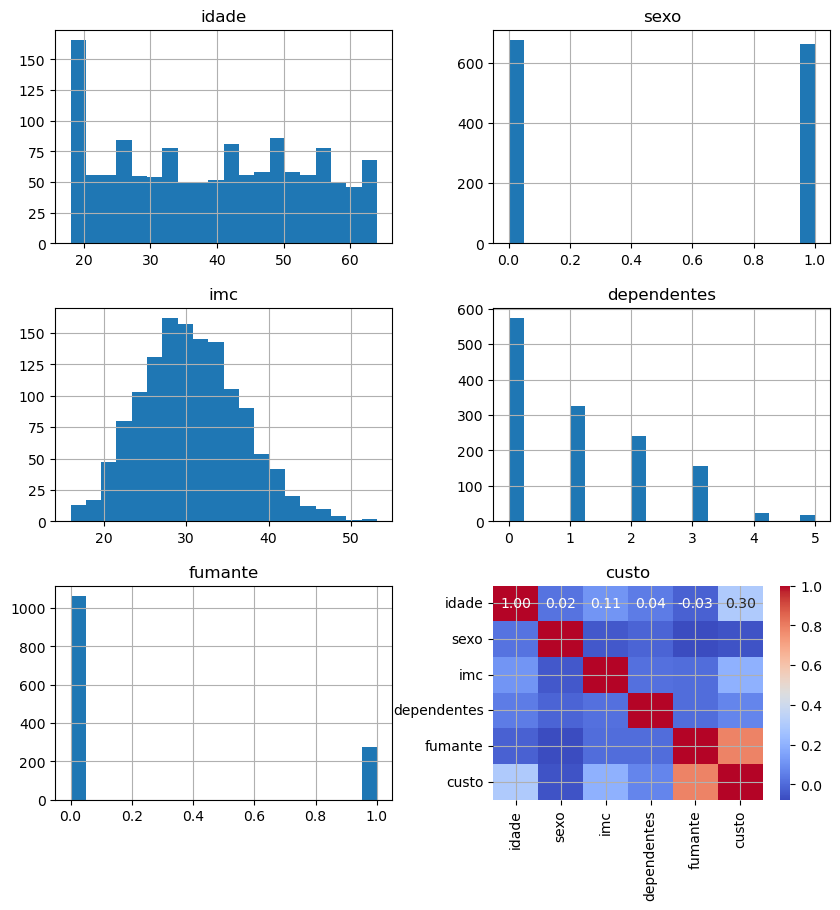

In [15]:
dados.hist(bins=20, figsize=(10,10))
sns.heatmap(dados_correlacao, annot=True, cmap="coolwarm", fmt=".2f")

<Axes: title={'center': 'custo'}>

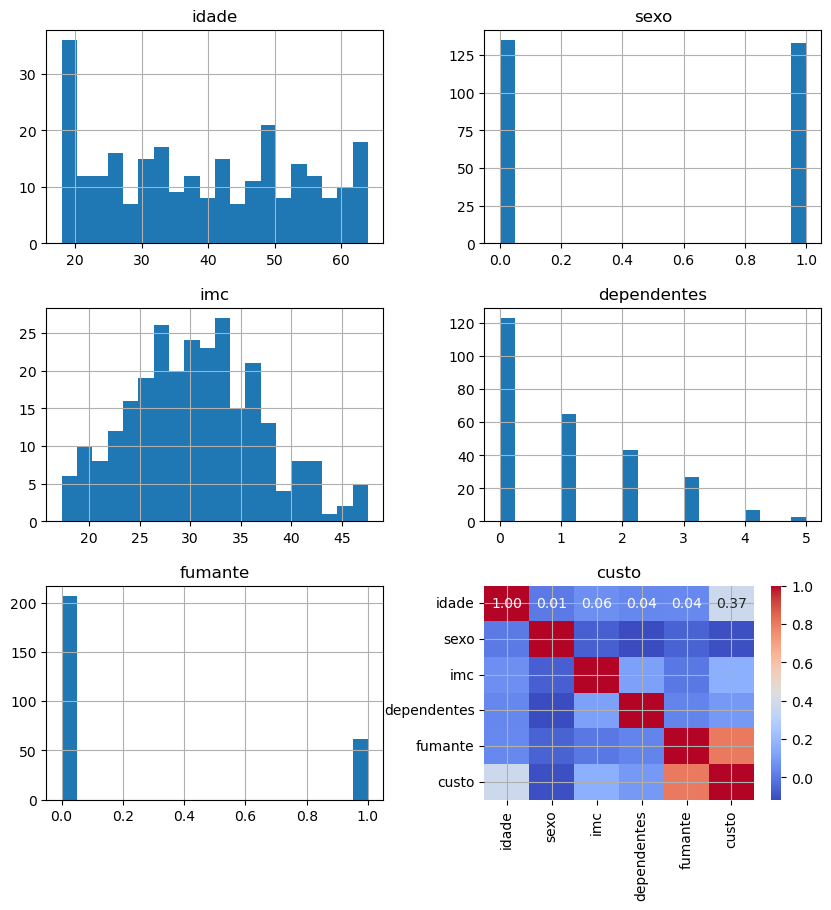

In [16]:
dados_treino.hist(bins=20, figsize=(10,10))
sns.heatmap(dados_treino_correlacao, annot=True, cmap="coolwarm", fmt=".2f")

<Axes: title={'center': 'custo'}>

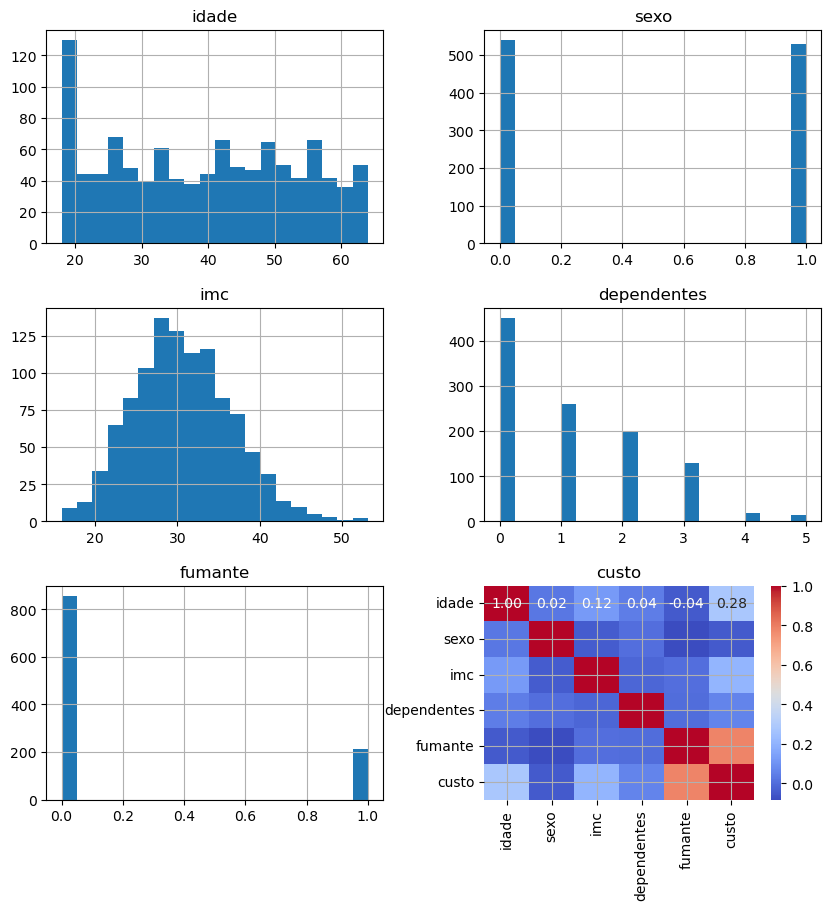

In [17]:
dados_teste.hist(bins=20, figsize=(10,10))
sns.heatmap(dados_teste_correlacao, annot=True, cmap="coolwarm", fmt=".2f")

In [18]:
dados = dados.dropna()
dados = dados.drop_duplicates()
dados_treino = dados_treino.dropna()
dados_treino = dados_treino.drop_duplicates()
dados_teste = dados_teste.dropna()
dados_teste = dados_teste.drop_duplicates()

In [19]:
print(dados.info())
print(dados_treino.info())
print(dados_teste.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idade        1337 non-null   int64  
 1   sexo         1337 non-null   int32  
 2   imc          1337 non-null   float64
 3   dependentes  1337 non-null   int64  
 4   fumante      1337 non-null   int32  
 5   custo        1337 non-null   float64
dtypes: float64(2), int32(2), int64(2)
memory usage: 62.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idade        268 non-null    int64  
 1   sexo         268 non-null    int32  
 2   imc          268 non-null    float64
 3   dependentes  268 non-null    int64  
 4   fumante      268 non-null    int32  
 5   custo        268 non-null    float64
dtypes: float64(2), int32(2), int64(2)
memory usage: 10.6

In [20]:
x = dados.drop(columns=['custo'])
x_treino = dados_treino.drop(columns=['custo'])
x_teste = dados_teste.drop(columns=['custo'])

In [21]:
y = dados.drop(columns=['idade', 'sexo', 'imc', 'dependentes', 'fumante'])
y_treino = dados_treino.drop(columns=['idade', 'sexo', 'imc', 'dependentes', 'fumante'])
y_teste = dados_teste.drop(columns=['idade', 'sexo', 'imc', 'dependentes', 'fumante'])

In [22]:
x_escalado = StandardScaler().fit_transform(x)
x_treino_escalado = StandardScaler().fit_transform(x_treino)
x_teste_escalado = StandardScaler().fit_transform(x_teste)

In [23]:
print(x_escalado)
print(x_treino_escalado)
print(x_teste_escalado)

[[-1.44041773  1.00977099 -0.45315959 -0.90923416  1.96966039]
 [-1.51164747 -0.99032355  0.50942165 -0.07944162 -0.50770174]
 [-0.79935006 -0.99032355  0.3831546   1.58014347 -0.50770174]
 ...
 [-1.51164747  1.00977099  1.01448983 -0.90923416 -0.50770174]
 [-1.29795825  1.00977099 -0.79752426 -0.90923416 -0.50770174]
 [ 1.55123139  1.00977099 -0.26129928 -0.90923416  1.96966039]]
[[-1.38948801  1.00749074 -0.42672095 -0.85632393  1.84212991]
 [-1.45880722 -0.99256495  0.48264134 -0.02179734 -0.54284988]
 [-0.97357276 -0.99256495 -0.68698137 -0.85632393 -0.54284988]
 ...
 [ 1.59123794 -0.99256495 -0.61339584 -0.85632393  1.84212991]
 [ 1.2446419   1.00749074 -0.76134149  0.81272926 -0.54284988]
 [-1.11221117  1.00749074  0.42532208 -0.85632393 -0.54284988]]
[[-0.80644159 -0.98884723  0.38889574  1.5652332  -0.49853929]
 [-0.44794865 -0.98884723 -1.32619957 -0.92209283 -0.49853929]
 [-0.51964724 -0.98884723 -0.29747557 -0.92209283 -0.49853929]
 ...
 [-1.52342746  1.01127855  1.0302864  

In [24]:
modelo = LinearRegression()
modelo.fit(x_treino_escalado, y_treino)

LinearRegression()

In [25]:
y_pred_x = modelo.predict(x_escalado)
y_pred_x_teste = modelo.predict(x_teste_escalado)

In [26]:
y = np.array(y)
y_treino = np.array(y_treino)

In [27]:
mse_y = mean_squared_error(y, y_pred_x)
rmse_y = np.sqrt(mse_y)
r2_y = r2_score(y, y_pred_x)

In [28]:
print(f"MSE_Y: {mse_y:.2f}")
print(f"RMSE: {rmse_y:.2f}")
print(f"R-squared_Y: {r2_y:.2f}")

MSE_Y: 37923639.40
RMSE: 6158.22
R-squared_Y: 0.74


In [29]:
mse_y_teste = mean_squared_error(y_teste, y_pred_x_teste)
rmse_y_teste = np.sqrt(mse_y_teste)
r2_y_teste = r2_score(y_teste, y_pred_x_teste)

In [30]:
print(f"MSE: {mse_y_teste:.2f}")
print(f"RMSE: {rmse_y_teste:.2f}")
print(f"R-squared: {r2_y_teste:.2f}")

MSE: 38443515.29
RMSE: 6200.28
R-squared: 0.73


In [31]:
type(y_teste)

pandas.core.frame.DataFrame

In [32]:
y_teste = pd.DataFrame(y_teste)
y_teste = y_teste.to_numpy()
type(y_teste)

numpy.ndarray

In [33]:
x_teste_escalado = pd.DataFrame(x_teste_escalado)
x_teste_escalado = x_teste_escalado.to_numpy()
type(x_teste_escalado)

numpy.ndarray

In [34]:
#plt.scatter(x_teste_escalado, y_teste, color="red", label="Dataset 1")
#plt.scatter(x_treino_escalado, y_treino, color="green", label="Dataset 2")

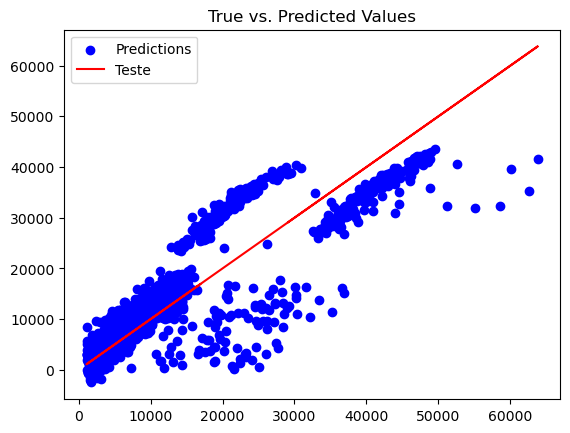

In [35]:
plt.scatter(y, y_pred_x, color='blue', label='Predictions')
plt.plot(y, y, color='red', label='Teste')
plt.title('True vs. Predicted Values')
plt.legend()
plt.show()

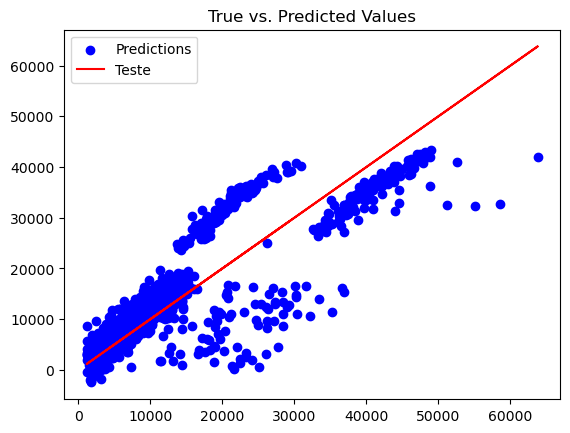

In [36]:
plt.scatter(y_teste, y_pred_x_teste, color='blue', label='Predictions')
plt.plot(y_teste, y_teste, color='red', label='Teste')
plt.title('True vs. Predicted Values')
plt.legend()
plt.show()